In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import matplotlib.colors as mcolors

In [19]:
covid_data = pd.read_csv('C:\\Users\\velsystem\\Desktop\covid-data.csv');
covid_data.head(10)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
5,AFG,Asia,Afghanistan,2020-02-29,1.0,0.0,0.143,NaN,NaN,0.0,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
6,AFG,Asia,Afghanistan,2020-03-01,1.0,0.0,0.143,NaN,NaN,0.0,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
7,AFG,Asia,Afghanistan,2020-03-02,1.0,0.0,0.000,NaN,NaN,0.0,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
8,AFG,Asia,Afghanistan,2020-03-03,2.0,1.0,0.143,NaN,NaN,0.0,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
9,AFG,Asia,Afghanistan,2020-03-04,4.0,2.0,0.429,NaN,NaN,0.0,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN


In [20]:
covid_data.shape

(108101, 60)

In [21]:
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108101 entries, 0 to 108100
Data columns (total 60 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   iso_code                               108101 non-null  object 
 1   continent                              103090 non-null  object 
 2   location                               108101 non-null  object 
 3   date                                   108101 non-null  object 
 4   total_cases                            103619 non-null  float64
 5   new_cases                              103616 non-null  float64
 6   new_cases_smoothed                     102606 non-null  float64
 7   total_deaths                           93220 non-null   float64
 8   new_deaths                             93375 non-null   float64
 9   new_deaths_smoothed                    102606 non-null  float64
 10  total_cases_per_million                103070 non-null  

In [22]:
covid_data.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations',
       'new_vaccinations_smoothed', 'total_vaccinations_per_hun

In [23]:
covid_data.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
count,1.036190e+05,103616.000000,102606.000000,9.322000e+04,93375.000000,102606.000000,103070.000000,103067.000000,102062.000000,92684.000000,...,65055.000000,96578.000000,99230.000000,75473.000000,74371.000000,48508.000000,87893.000000,102592.000000,96684.000000,3814.000000
mean,1.209098e+06,6196.033306,6202.277199,3.185902e+04,145.675791,131.752751,14955.089776,77.901444,78.015175,323.760699,...,13.442541,258.814169,7.958663,10.583250,32.718136,50.790837,3.026052,73.243074,0.726989,18.228529
std,8.190754e+06,38225.430236,37831.252928,1.901760e+05,796.014577,741.607690,26641.722311,201.861812,159.148752,570.694930,...,19.973350,119.156219,4.190008,10.485016,13.492300,31.756531,2.456087,7.554119,0.150299,35.577132
min,1.000000e+00,-74347.000000,-6223.000000,1.000000e+00,-1918.000000,-232.143000,0.001000,-3162.163000,-276.825000,0.001000,...,0.100000,79.370000,0.990000,0.100000,7.700000,1.188000,0.100000,53.280000,0.394000,-95.590000
25%,1.524000e+03,2.000000,8.000000,6.000000e+01,0.000000,0.000000,292.769500,0.242000,1.403250,8.930000,...,0.600000,168.711000,5.310000,1.900000,21.600000,19.351000,1.300000,67.920000,0.602000,0.535000
50%,1.600300e+04,79.000000,98.286000,4.710000e+02,2.000000,1.429000,2168.089000,9.200000,12.327000,59.160000,...,2.200000,242.648000,7.110000,6.300000,31.400000,49.839000,2.400000,74.620000,0.744000,7.515000
75%,1.689010e+05,855.000000,904.286000,4.468250e+03,18.000000,15.000000,16257.229750,73.252000,81.261500,365.324000,...,21.200000,329.942000,10.080000,19.300000,41.100000,83.241000,3.861000,78.740000,0.848000,24.022500
max,2.027283e+08,905993.000000,826368.143000,4.294361e+06,18000.000000,14726.429000,192014.496000,18293.675000,4083.500000,5973.278000,...,77.600000,724.417000,30.530000,44.000000,78.100000,100.000000,13.800000,86.750000,0.957000,410.620000


In [24]:
covid_data.nunique()

iso_code                                   231
continent                                    6
location                                   231
date                                       586
total_cases                              58108
new_cases                                13820
new_cases_smoothed                       26597
total_deaths                             22239
new_deaths                                3186
new_deaths_smoothed                       7276
total_cases_per_million                  80671
new_cases_per_million                    44946
new_cases_smoothed_per_million           50926
total_deaths_per_million                 50766
new_deaths_per_million                    8133
new_deaths_smoothed_per_million           9509
reproduction_rate                          370
icu_patients                              2654
icu_patients_per_million                  5954
hosp_patients                             5159
hosp_patients_per_million                 9937
weekly_icu_ad

In [25]:
covid_data.isnull().sum()

iso_code                                      0
continent                                  5011
location                                      0
date                                          0
total_cases                                4482
new_cases                                  4485
new_cases_smoothed                         5495
total_deaths                              14881
new_deaths                                14726
new_deaths_smoothed                        5495
total_cases_per_million                    5031
new_cases_per_million                      5034
new_cases_smoothed_per_million             6039
total_deaths_per_million                  15417
new_deaths_per_million                    15262
new_deaths_smoothed_per_million            6039
reproduction_rate                         21064
icu_patients                              96926
icu_patients_per_million                  96926
hosp_patients                             94585
hosp_patients_per_million               

In [26]:
covid_data.continent.value_counts()[0:10]

Africa           27681
Europe           25535
Asia             25425
North America    13566
South America     6440
Oceania           4443
Name: continent, dtype: int64

In [27]:
dataset = covid_data[covid_data['date']=='2020-11-15']
dataset = dataset[~dataset['location'].isin(['World','International'])]
dataset.head(10)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
265,AFG,Asia,Afghanistan,2020-11-15,43240.0,205.0,154.429,1620.0,12.0,7.857,...,NaN,597.029,9.59,NaN,NaN,37.746,0.50,64.83,0.511,NaN
808,OWID_AFR,NaN,Africa,2020-11-15,1976022.0,12570.0,13308.857,47362.0,296.0,286.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1339,ALB,Europe,Albania,2020-11-15,27830.0,597.0,517.714,623.0,11.0,9.143,...,1.1,304.195,10.08,7.1,51.2,NaN,2.89,78.57,0.795,NaN
1870,DZA,Africa,Algeria,2020-11-15,67679.0,860.0,804.000,2154.0,15.0,15.143,...,0.5,278.364,6.73,0.7,30.4,83.741,1.90,76.88,0.748,NaN
2395,AND,Europe,Andorra,2020-11-15,5872.0,147.0,69.857,76.0,1.0,0.143,...,NaN,109.135,7.97,29.0,37.8,NaN,NaN,83.73,0.868,NaN
2902,AGO,Africa,Angola,2020-11-15,13451.0,77.0,145.429,322.0,0.0,2.143,...,NaN,276.045,3.94,NaN,NaN,26.664,NaN,61.15,0.581,NaN
3593,ATG,North America,Antigua and Barbuda,2020-11-15,134.0,0.0,0.429,4.0,0.0,0.143,...,NaN,191.511,13.17,NaN,NaN,NaN,3.80,77.02,0.778,NaN
4179,ARG,South America,Argentina,2020-11-15,1310491.0,5645.0,9758.429,35436.0,129.0,268.000,...,0.6,191.032,5.50,16.2,27.7,NaN,5.00,76.67,0.845,NaN
4705,ARM,Asia,Armenia,2020-11-15,117337.0,1482.0,1559.000,1763.0,25.0,29.143,...,1.8,341.010,7.11,1.5,52.1,94.043,4.20,75.09,0.776,NaN
5401,OWID_ASI,NaN,Asia,2020-11-15,15118723.0,81910.0,93796.714,266669.0,1520.0,1557.714,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
covid_data["location"].value_counts()

Peru                               586
Argentina                          586
Mexico                             586
Thailand                           583
Taiwan                             571
                                  ... 
Tuvalu                              50
Pitcairn                            49
Niue                                16
Bonaire Sint Eustatius and Saba      1
Turkmenistan                         1
Name: location, Length: 231, dtype: int64

In [29]:
india=covid_data[covid_data["location"]=="India"]

In [30]:
india.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
44682,IND,Asia,India,2020-01-30,1.0,1.0,NaN,NaN,NaN,NaN,...,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,NaN
44683,IND,Asia,India,2020-01-31,1.0,0.0,NaN,NaN,NaN,NaN,...,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,NaN
44684,IND,Asia,India,2020-02-01,1.0,0.0,NaN,NaN,NaN,NaN,...,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,NaN
44685,IND,Asia,India,2020-02-02,2.0,1.0,NaN,NaN,NaN,NaN,...,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,NaN
44686,IND,Asia,India,2020-02-03,3.0,1.0,NaN,NaN,NaN,NaN,...,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,NaN


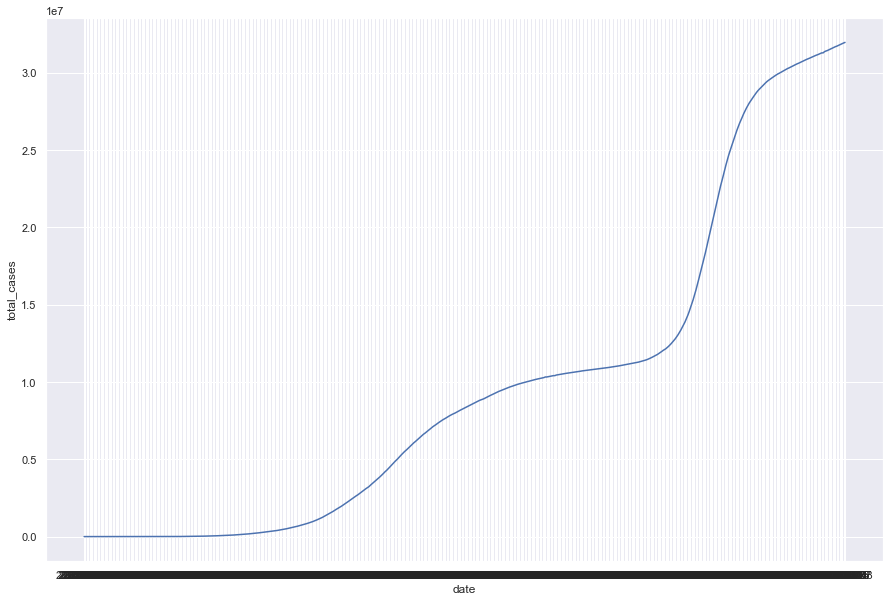

In [31]:
sns.set(rc={"figure.figsize":(15,10)})
sns.lineplot(x="date",y="total_cases",data=india)
plt.show()

In [32]:
india_last_5_days=india.tail()

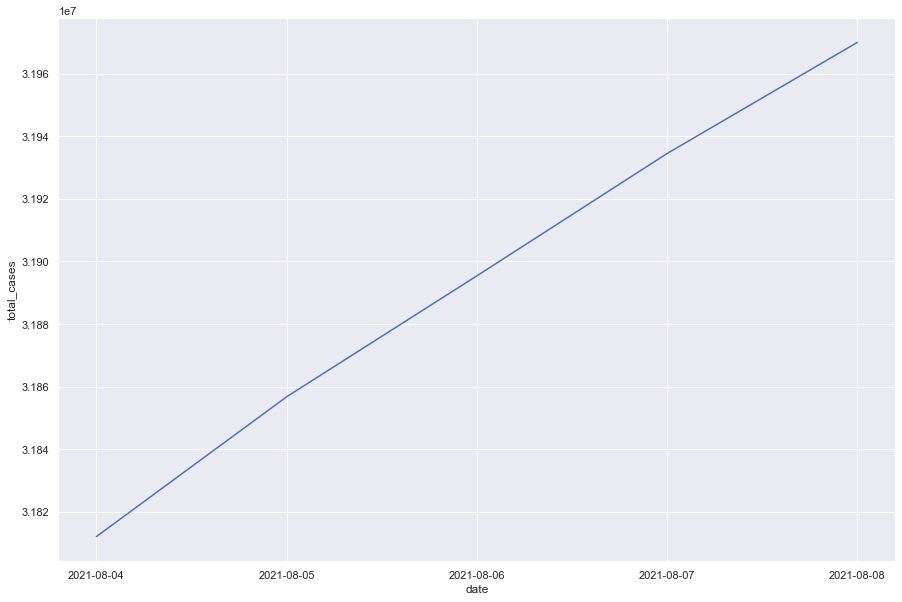

In [33]:
sns.set(rc={"figure.figsize":(15,10)})
sns.lineplot(x="date",y="total_cases",data=india_last_5_days)
plt.show()

In [34]:
brazil=covid_data[covid_data["location"]=="Brazil"]

In [35]:
brazil.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
13724,BRA,South America,Brazil,2020-02-26,1.0,1.0,NaN,NaN,NaN,NaN,...,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,NaN
13725,BRA,South America,Brazil,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,NaN
13726,BRA,South America,Brazil,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,NaN
13727,BRA,South America,Brazil,2020-02-29,2.0,1.0,NaN,NaN,NaN,NaN,...,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,9.91
13728,BRA,South America,Brazil,2020-03-01,2.0,0.0,NaN,NaN,NaN,NaN,...,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,NaN


In [36]:
brazil.tail()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
14249,BRA,South America,Brazil,2021-08-04,20026533.0,40716.0,32778.143,559607.0,1175.0,918.286,...,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,NaN
14250,BRA,South America,Brazil,2021-08-05,20066587.0,40054.0,32459.714,560706.0,1099.0,887.000,...,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,NaN
14251,BRA,South America,Brazil,2021-08-06,20108746.0,42159.0,32639.000,561762.0,1056.0,900.286,...,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,NaN
14252,BRA,South America,Brazil,2021-08-07,20151779.0,43033.0,33417.714,562752.0,990.0,911.714,...,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,NaN
14253,BRA,South America,Brazil,2021-08-08,20165672.0,13893.0,32473.429,563151.0,399.0,902.429,...,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,NaN


In [37]:
brazil_last_5_days=brazil.tail()

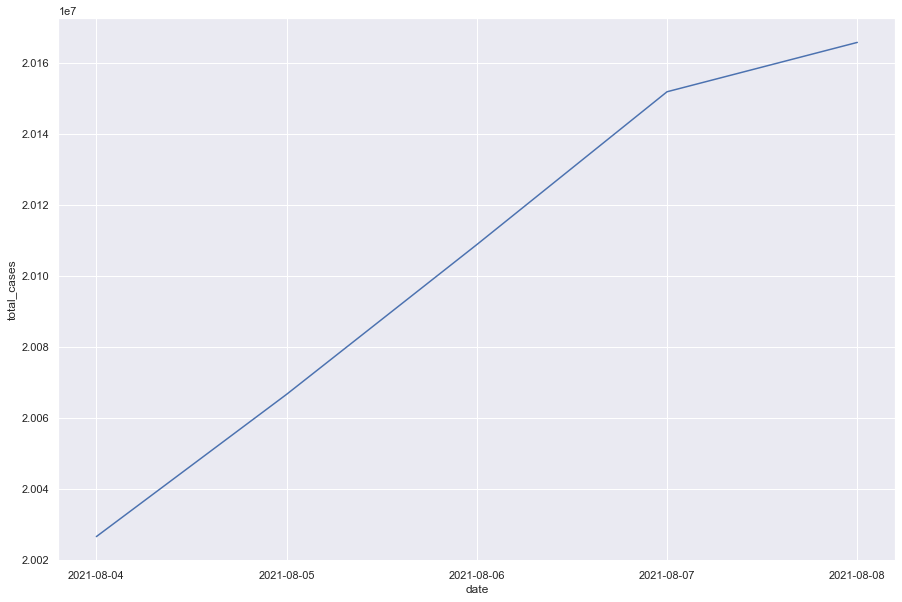

In [38]:
sns.set(rc={"figure.figsize":(15,10)})
sns.lineplot(x="date",y="total_cases",data=brazil_last_5_days)
plt.show()


In [39]:
india_japan_china=covid_data[(covid_data["location"]=="India") | (covid_data["location"]=="China") | (covid_data["location"]=="Japan")]

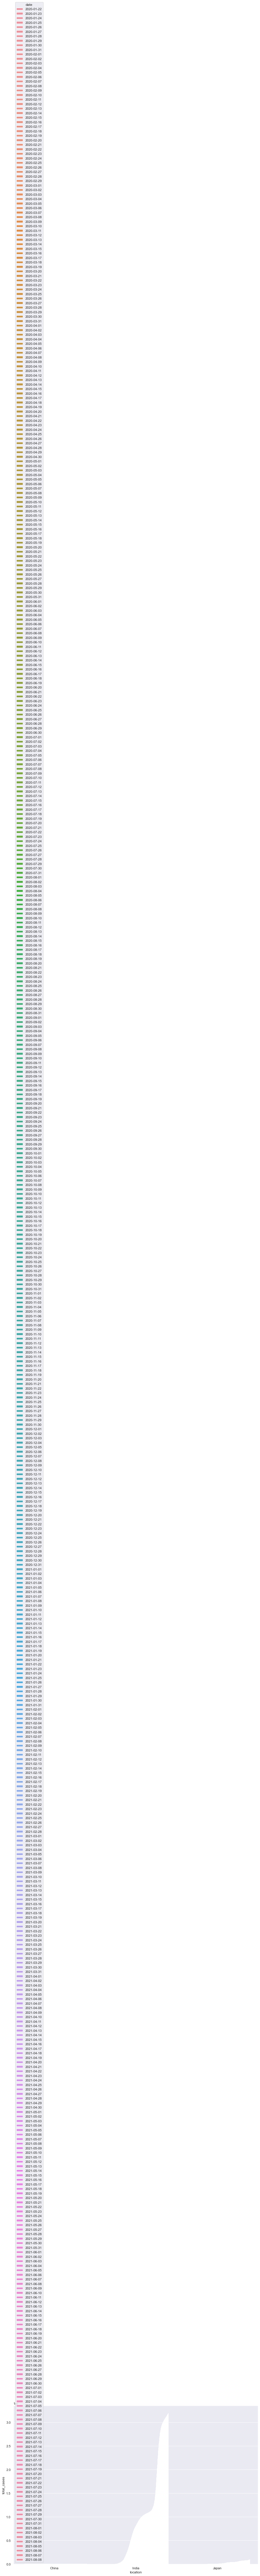

In [40]:
sns.set(rc={"figure.figsize":(15,10)})
sns.barplot(x="location",y="total_cases",data=india_japan_china,hue="date")
plt.show()

In [41]:
germany_spain=covid_data[(covid_data["location"]=="Germany") | (covid_data["location"]=="Spain")]

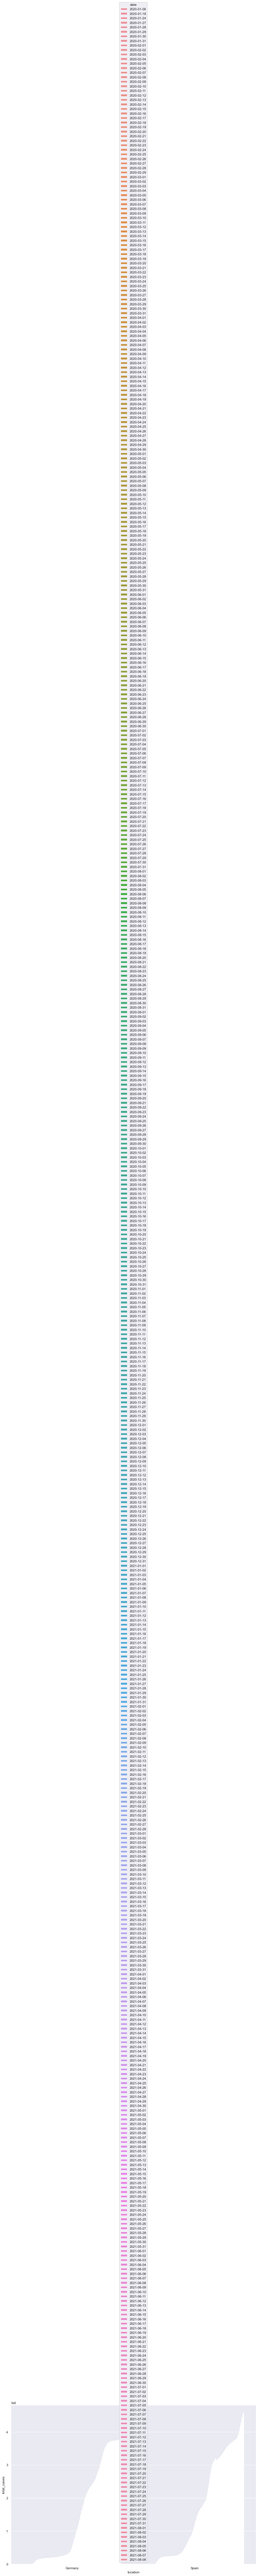

In [42]:
sns.set(rc={"figure.figsize":(15,10)})
sns.barplot(x="location",y="total_cases",data=germany_spain,hue="date")
plt.show()

In [43]:
last_day_cases=covid_data[(covid_data["date"]=="2020-12-18")]
last_day_cases


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
298,AFG,Asia,Afghanistan,2020-12-18,49621.0,243.0,215.000,2030.0,5.0,12.143,...,NaN,597.029,9.59,NaN,NaN,37.746,0.500,64.83,0.511,NaN
841,OWID_AFR,NaN,Africa,2020-12-18,2469647.0,19320.0,17818.286,58310.0,496.0,378.286,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1372,ALB,Europe,Albania,2020-12-18,52004.0,580.0,734.429,1066.0,11.0,12.714,...,1.1,304.195,10.08,7.100,51.200,NaN,2.890,78.57,0.795,NaN
1903,DZA,Africa,Algeria,2020-12-18,94371.0,438.0,464.286,2647.0,7.0,10.286,...,0.5,278.364,6.73,0.700,30.400,83.741,1.900,76.88,0.748,NaN
2428,AND,Europe,Andorra,2020-12-18,7519.0,53.0,40.429,80.0,1.0,0.286,...,NaN,109.135,7.97,29.000,37.800,NaN,NaN,83.73,0.868,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105667,VNM,Asia,Vietnam,2020-12-18,1410.0,3.0,2.714,35.0,0.0,0.000,...,2.0,245.465,6.00,1.000,45.900,85.847,2.600,75.40,0.704,NaN
106365,OWID_WRL,NaN,World,2020-12-18,75793461.0,720670.0,646028.000,1734452.0,12916.0,11640.000,...,10.0,233.070,8.51,6.434,34.635,60.130,2.705,72.58,0.737,NaN
106851,YEM,Asia,Yemen,2020-12-18,2087.0,0.0,0.714,606.0,0.0,0.000,...,18.8,495.003,5.35,7.600,29.200,49.542,0.700,66.12,0.470,NaN
107360,ZMB,Africa,Zambia,2020-12-18,18575.0,71.0,59.143,373.0,4.0,1.143,...,57.5,234.499,3.94,3.100,24.700,13.938,2.000,63.89,0.584,NaN


In [44]:
max_cases_country=last_day_cases.sort_values(by="total_cases",ascending=False)
max_cases_country

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
106365,OWID_WRL,NaN,World,2020-12-18,75793461.0,720670.0,646028.000,1734452.0,12916.0,11640.000,...,10.0,233.070,8.51,6.434,34.635,60.130,2.705,72.58,0.737,NaN
32797,OWID_EUR,NaN,Europe,2020-12-18,21074550.0,244541.0,212044.714,486362.0,5713.0,4998.429,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71785,OWID_NAM,NaN,North America,2020-12-18,20255205.0,277747.0,244056.429,467816.0,3932.0,3532.143,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5434,OWID_ASI,NaN,Asia,2020-12-18,19629928.0,100404.0,102874.429,319862.0,1369.0,1446.571,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
102771,USA,North America,United States,2020-12-18,17575536.0,251832.0,221064.286,318331.0,2966.0,2713.714,...,1.2,151.089,10.79,19.100,24.600,NaN,2.770,78.86,0.926,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104590,VAT,Europe,Vatican,2020-12-18,27.0,0.0,0.000,NaN,NaN,0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.12,NaN,NaN
88615,SLB,Oceania,Solomon Islands,2020-12-18,17.0,0.0,0.000,NaN,NaN,0.000,...,25.1,459.780,18.68,NaN,NaN,35.890,1.400,73.00,0.567,NaN
61628,MHL,Oceania,Marshall Islands,2020-12-18,4.0,0.0,0.000,NaN,NaN,0.000,...,NaN,557.793,30.53,NaN,NaN,82.502,2.700,73.70,0.704,NaN
82973,WSM,Oceania,Samoa,2020-12-18,2.0,0.0,0.000,NaN,NaN,0.000,...,NaN,348.977,9.21,16.700,38.100,NaN,NaN,73.32,0.715,NaN


In [45]:
max_cases_country[1:6]

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
32797,OWID_EUR,NaN,Europe,2020-12-18,21074550.0,244541.0,212044.714,486362.0,5713.0,4998.429,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71785,OWID_NAM,NaN,North America,2020-12-18,20255205.0,277747.0,244056.429,467816.0,3932.0,3532.143,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5434,OWID_ASI,NaN,Asia,2020-12-18,19629928.0,100404.0,102874.429,319862.0,1369.0,1446.571,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
102771,USA,North America,United States,2020-12-18,17575536.0,251832.0,221064.286,318331.0,2966.0,2713.714,...,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,NaN
33361,OWID_EUN,NaN,European Union,2020-12-18,13969915.0,157984.0,133727.286,331199.0,4093.0,3516.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


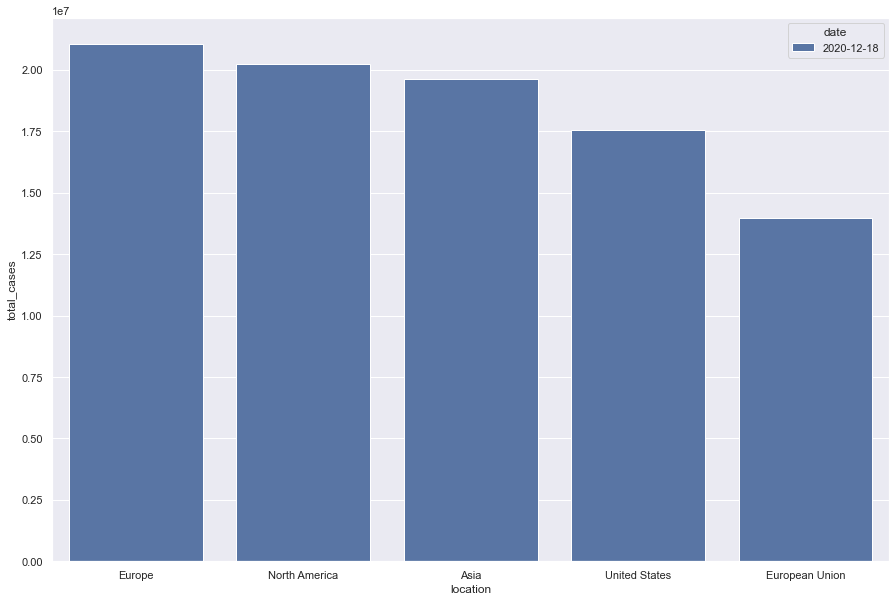

In [46]:
sns.barplot(x="location",y="total_cases",data=max_cases_country[1:6],hue="date")
plt.show()